In [1]:
# sklearn
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [8]:
# Load results
F1_score = pd.read_excel('./LSTM results/F1/F1_Score.xlsx')

### F1 Score comparison - 1D Convolutional LSTM

In [9]:
color_list = ['grey'] + ['cornflowerblue']*11

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

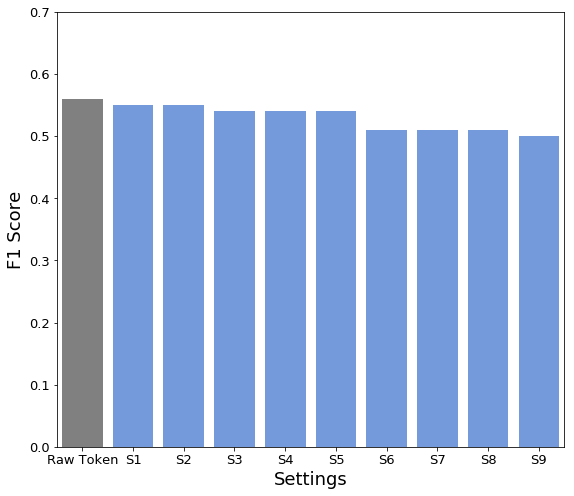

In [10]:
fig, ax = plt.subplots(figsize=(20,8))

ax = plt.subplot(121)
ax = sns.barplot(x=F1_score['Label'][:12], y=F1_score['F1 Score'][:12], palette=color_list)
ax = plt.ylim(0, 0.7)
# ax = plt.title('1D Convolutional LSTM', fontsize=22)
ax = plt.ylabel('F1 Score', fontsize=18)
ax = plt.xlabel('Settings', fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

### F1 Score comparison - LSTM

In [14]:
LSTM_score = F1_score.drop(range(1,15))
LSTM_score.drop(range(19,37), inplace=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

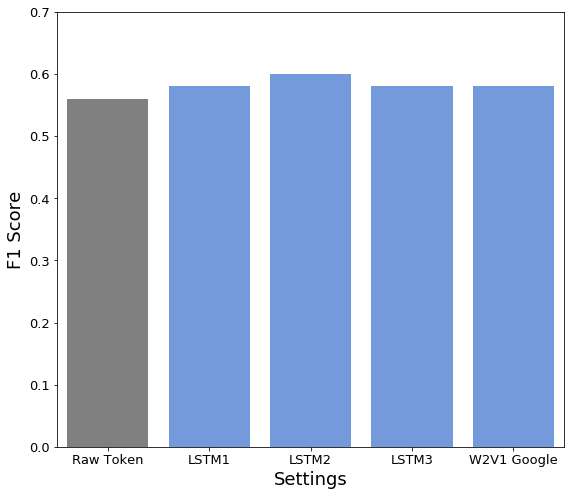

In [15]:
fig, ax = plt.subplots(figsize=(20,8))

ax = plt.subplot(121)
ax = sns.barplot(x=LSTM_score['Label'], y=LSTM_score['F1 Score'], palette=color_list)
ax = plt.ylim(0, 0.7)
# ax = plt.title('LSTM', fontsize=22)
ax = plt.ylabel('F1 Score', fontsize=18)
ax = plt.xlabel('Settings', fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

### LSTM Precision, Recall, F1

In [25]:
LSTM_combined_score = pd.read_pickle('./LSTM1_combined_score.pkl')

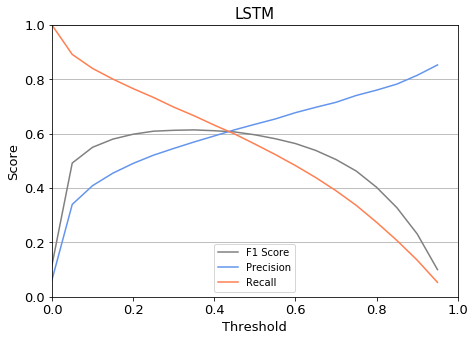

In [32]:
fig, ax = plt.subplots(figsize=(16,5))

plt.subplot(121)
sns.lineplot(x=LSTM_combined_score.index, y=LSTM_combined_score['F1 Score'], color='grey')
sns.lineplot(x=LSTM_combined_score.index, y=LSTM_combined_score['Precision'], color='cornflowerblue')
sns.lineplot(x=LSTM_combined_score.index, y=LSTM_combined_score['Recall'], color='coral')
plt.ylim(0, 1)
plt.xlim(0, 1)
# plt.xticks(rotation=45)
plt.title('LSTM', fontsize=15)
plt.ylabel('Score', fontsize = 13)
plt.yticks(fontsize=13)
plt.xlabel('Threshold', fontsize = 13)
plt.xticks(fontsize=13)
plt.legend(LSTM_combined_score.columns, loc='lower center')
plt.grid(axis='y')


### Best Bag of Words vs Best LSTM model

In [21]:
final_score = pd.DataFrame()
final_score['Model'] = ['Bag of Words', 'LSTM']
final_score['Insincere capture rate'] = [82, 86]
final_score['Sincere capture rate'] = [10, 8]

In [22]:
final_score

,Model,Insincere capture rate,Sincere capture rate
0,Bag of Words,82,10
1,LSTM,86,8


#### Insincere Capture Rate

(array([0, 1]), <a list of 2 Text xticklabel objects>)

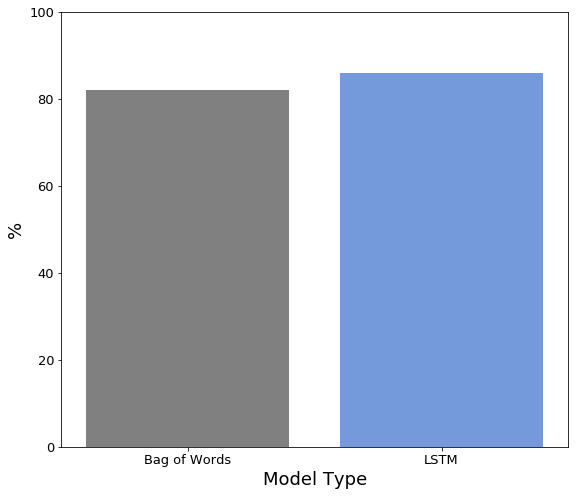

In [37]:
fig, ax = plt.subplots(figsize=(20,8))

ax = plt.subplot(121)
ax = sns.barplot(x=final_score['Model'], y=final_score['Insincere capture rate'], palette=color_list)
ax = plt.ylim(0,100)
# ax = plt.title('LSTM', fontsize=22)
ax = plt.ylabel('%', fontsize=18)
ax = plt.xlabel('Model Type', fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

#### Sincere Capture Rate

(array([0, 1]), <a list of 2 Text xticklabel objects>)

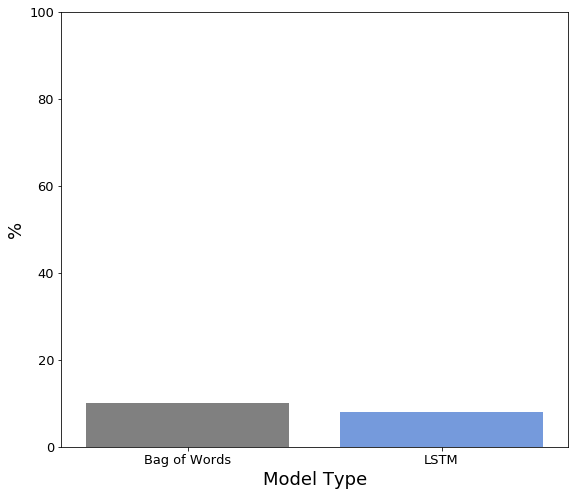

In [35]:
fig, ax = plt.subplots(figsize=(20,8))

ax = plt.subplot(121)
ax = sns.barplot(x=final_score['Model'], y=final_score['Sincere capture rate'], palette=color_list)
ax = plt.ylim(0,100)
# ax = plt.title('LSTM', fontsize=22)
ax = plt.ylabel('%', fontsize=18)
ax = plt.xlabel('Model Type', fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

### Capture rate vs Rounding Threshold

In [48]:
confusion_matrix_result = pd.read_excel('./LSTM results/F1/LSTM2 Confusion.xlsx')

In [49]:
confusion_matrix_result

,Threshold,Correct Insincere,Incorrect Sincere
0,0.00,100.000000,100.000000
1,0.05,92.864249,10.779934
2,0.10,86.887266,7.661960
3,0.15,82.030194,6.159082
4,0.20,77.971291,5.219731
5,0.25,74.060884,4.558677
6,0.30,70.441282,4.037586
7,0.35,67.038238,3.597699
8,0.40,63.406262,3.251258
9,0.45,59.860908,2.917058


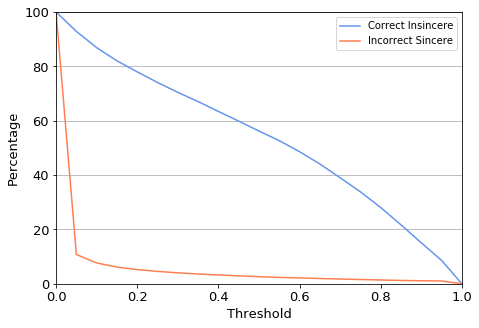

In [51]:
fig, ax = plt.subplots(figsize=(16,5))

plt.subplot(121)
sns.lineplot(x=confusion_matrix_result.Threshold, y=confusion_matrix_result['Correct Insincere'], color='cornflowerblue')
sns.lineplot(x=confusion_matrix_result.Threshold, y=confusion_matrix_result['Incorrect Sincere'], color='coral')
plt.ylim(0, 100)
plt.xlim(0, 1)
# plt.xticks(rotation=45)
plt.ylabel('Percentage', fontsize = 13)
plt.yticks(fontsize=13)
plt.xlabel('Threshold', fontsize = 13)
plt.xticks(fontsize=13)
plt.legend(confusion_matrix_result.columns[1:3], loc='upper right')
plt.grid(axis='y')
fig.patch.set_facecolor('white')
